# Titanic Classification Project

Importing Required Libraries and classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Titanic Dataset

In [2]:
train_set = pd.read_csv('./titanic/train.csv')
test_set = pd.read_csv('./titanic/test.csv')

### Meta data ( Description of data )
survival-	Survival	0 = No, 1 = Yes

pclass	-   Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	    -   Sex	

Age     -	Age in years	

sibsp	-   # of siblings / spouses aboard the Titanic

parch	-   # of parents / children aboard the Titanic

ticket	-   Ticket number	

fare	-   Passenger fare	

cabin	-   Cabin number	

embarked- 	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### Exploratory Data Analysis

In [3]:
train_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Splitting Features and Target
X_train = train_set.drop('Survived', axis=1)
y_train = train_set['Survived']

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
X_train.shape

(891, 11)

In [8]:
X_train['Embarked'].value_counts(), X_train['Sex'].value_counts(), X_train['Pclass'].value_counts()

(Embarked
 S    644
 C    168
 Q     77
 Name: count, dtype: int64,
 Sex
 male      577
 female    314
 Name: count, dtype: int64,
 Pclass
 3    491
 1    216
 2    184
 Name: count, dtype: int64)

In [9]:
pd.crosstab(X_train['Sex'], y_train)

Survived,0,1
Sex,,
female,81,233
male,468,109


In [10]:
pd.crosstab(X_train['Pclass'], y_train)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived'>

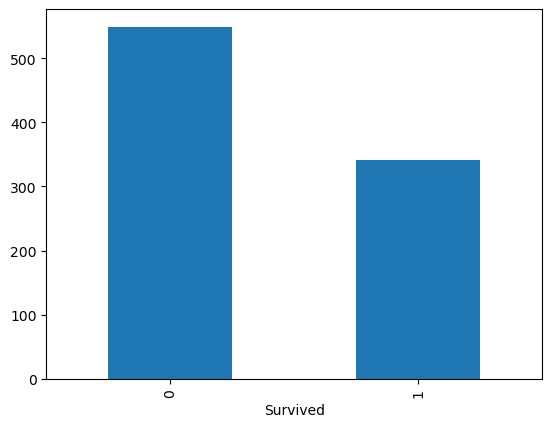

In [11]:
# y_train.value_counts(normalize='True')
y_train.value_counts().plot(kind='bar')

In [12]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age', ylabel='Count'>

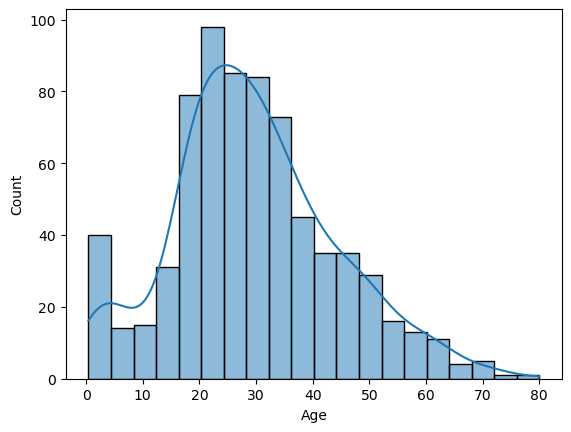

In [13]:
import seaborn as sns
sns.histplot(data=X_train, x='Age',kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

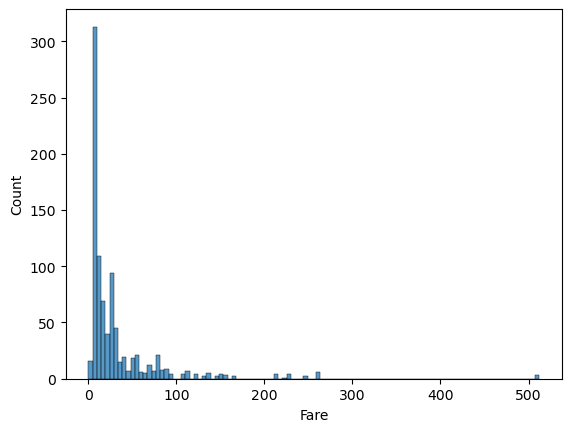

In [14]:
sns.histplot(data=X_train, x='Fare')

<Axes: xlabel='SibSp', ylabel='Count'>

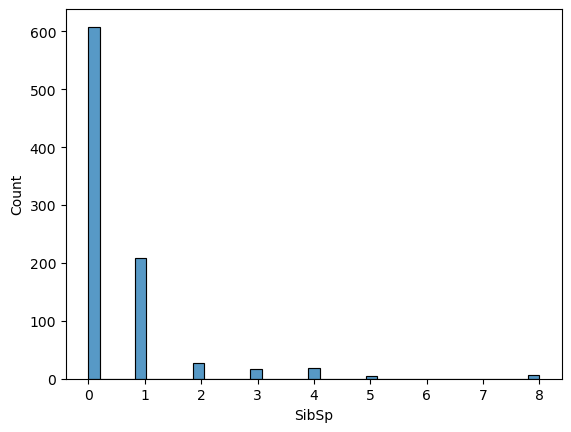

In [15]:
sns.histplot(data=X_train, x='SibSp')

In [16]:
X_train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='Fare'>

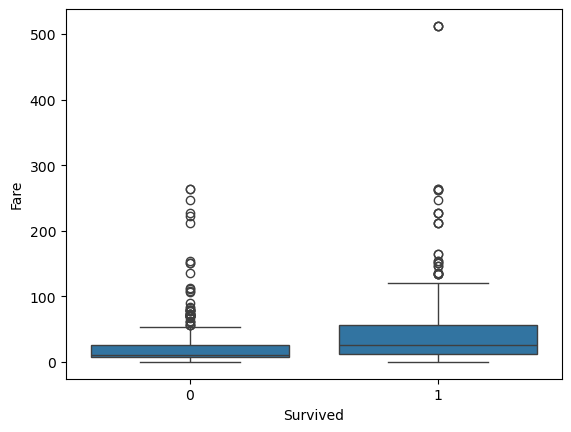

In [17]:
sns.boxplot(data=X_train, x=y_train, y='Fare')

<Axes: xlabel='Sex', ylabel='count'>

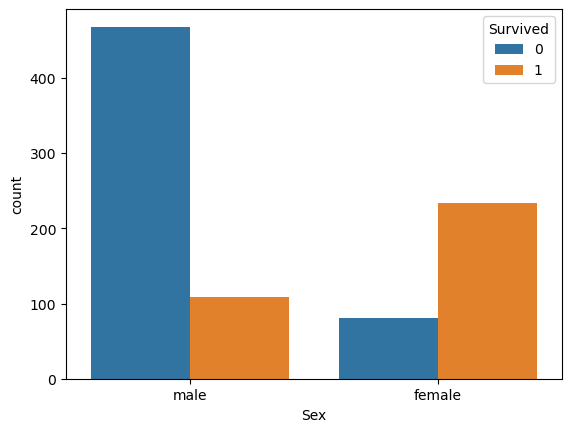

In [18]:
sns.countplot(x='Sex', hue='Survived', data=train_set)

<Axes: >

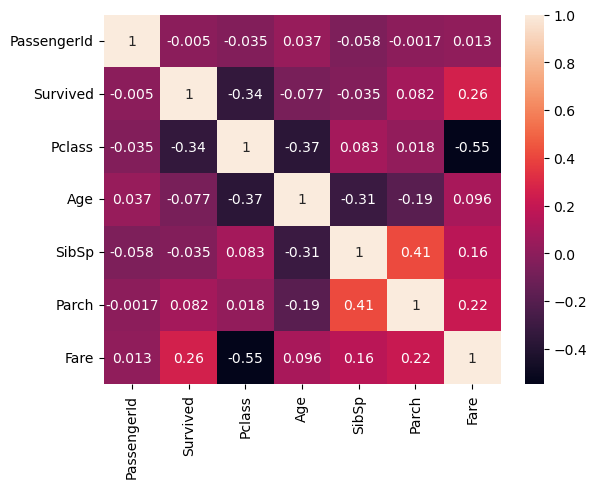

In [19]:
sns.heatmap(train_set.corr(numeric_only=True), annot=True)

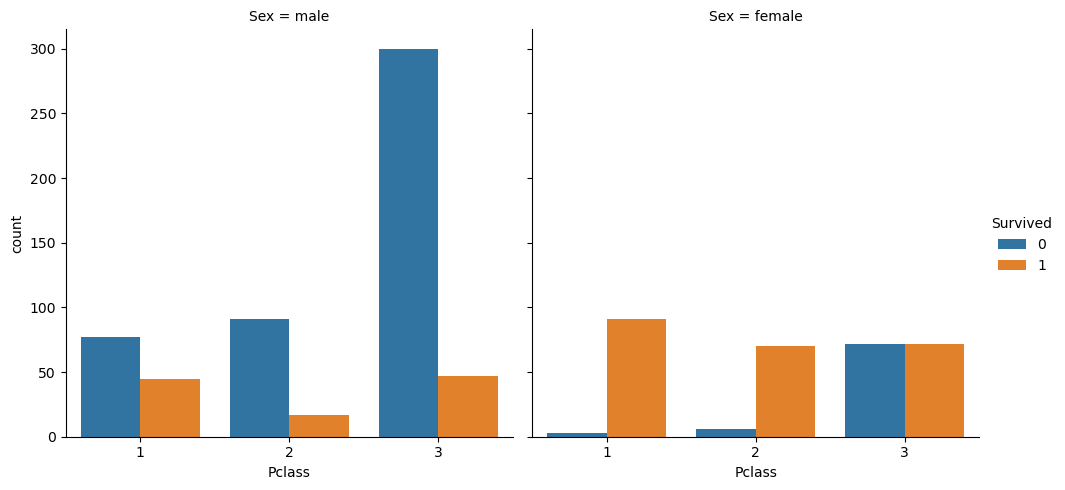

In [20]:
sns.catplot(x="Pclass", hue="Survived", col="Sex", kind="count", data=train_set)

In [21]:
train_set.groupby("Pclass")["Survived"].mean(), train_set.groupby("Embarked")["Survived"].mean()

(Pclass
 1    0.629630
 2    0.472826
 3    0.242363
 Name: Survived, dtype: float64,
 Embarked
 C    0.553571
 Q    0.389610
 S    0.336957
 Name: Survived, dtype: float64)

In [22]:
train_set.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [23]:
train_set['CabinLetter'] = train_set['Cabin'].str[0]

In [24]:
train_set['CabinLetter'].value_counts()

CabinLetter
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

<Axes: xlabel='CabinLetter', ylabel='Survived'>

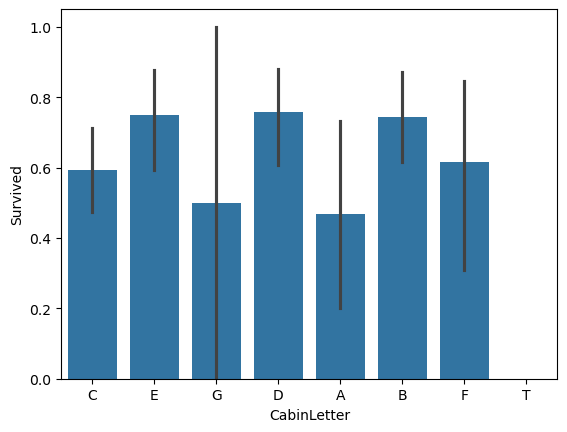

In [25]:
# Visualizing survival rate by deck
sns.barplot(train_set, x='CabinLetter', y='Survived')

In [26]:
train_set[["CabinLetter", "Survived"]].groupby("CabinLetter").mean().sort_values(by="Survived")

,Survived
CabinLetter,
T,0.000000
A,0.466667
G,0.500000
C,0.593220
F,0.615385
B,0.744681
E,0.750000
D,0.757576


**Insights** 
* Age feature has 177 missing values which will be filled by median age.
* Cabin feature has 687 missing (NaN) values, The first letter of Cabin will be extracted as a different feature as it has predictive power. Nan values will be replaced with 'U' depicting unknown.
* Embarked feature has 2 missing values, which will be filled by most repeated category (S).
* Females have much higher survival rate than males.
* Fare feature has a long tail so we have to calculate log of that.
* PassangerId, Names and Ticket attribute are not necessary so they'll be dropped.
* Fare Attribute has a positive relationship with Survival rate and Pclass Attribute has a negative relationship.

### Data Cleaning

In [27]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [28]:
X_train['CabinLetter'] = X_train['Cabin'].str[0]

In [29]:
# Dropping unneccesary Features
X_train.drop('Ticket', axis=1, inplace=True)
X_train.drop('Name', axis=1, inplace=True)
X_train.drop('PassengerId', axis=1, inplace=True)
X_train.drop('Cabin', axis=1, inplace=True)  # Cabin attribute is not important to us as a whole so we've extracted first letter of this feature as another seperate CabinLetter attribute

Here the problem is that we need to apply different pipelines for `CabinLetter` feature and `Embarked` feature. As in `CabinLetter` feature, we have to replace missing values with `'U'` and in Embarked we have to fill missing values with `most_frequent`

In [30]:
num_features = ["Pclass", "Age", "SibSp", "Parch"]
cat_features = ["Sex", "Embarked"]

# Pipeline for numeric attributes (excluding fare feature)
num_pipeline = Pipeline(
    [("impute", SimpleImputer(strategy="median")), ("standardize", StandardScaler())]
)

# Fare : log + scale
fare_pipeline = Pipeline(
    [
        ("impute", SimpleImputer(strategy="median")),
        # Function transformer to convert fare feature into gaussian/bell-shaped distribution
        (
            "log_transform",
            FunctionTransformer(
                lambda x: np.log1p(x), feature_names_out="one-to-one", validate=False
            ),
        ),
        ("standardize", StandardScaler()),
    ]
)

# Pipeline for categorical attributes (Normal)
cat_pipeline = Pipeline(
    [
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("encode", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Pipeline for categorical attribute (Cabin)
cat_pipeline_cabin = Pipeline(
    [
        ("impute", SimpleImputer(strategy="constant", fill_value="U")),
        ("encode", OneHotEncoder(handle_unknown="ignore")),
    ]
)

# Final ColumnTransformer
preprocessing = ColumnTransformer(
    [
        ("num", num_pipeline, num_features),
        ("fare", fare_pipeline, ["Fare"]),
        ("cat", cat_pipeline, cat_features),
        ("cabin", cat_pipeline_cabin, ["CabinLetter"]),
    ]
)

X_prepared = preprocessing.fit_transform(X_train)

In [31]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, roc_auc_score

def evaluate_models(models):
    for model in models: 
        pipeline = make_pipeline(preprocessing, model)
        try: 
            y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, method='decision_function')
            y_preds = y_scores > 0
        except AttributeError:
            y_scores = cross_val_predict(pipeline, X_train, y_train, cv=3, method='predict_proba')[:, -1]
            y_preds = y_scores > 0.5
        
        auc = roc_auc_score(y_train, y_scores)
        precision = precision_score(y_train, y_preds)
        recall = recall_score(y_train, y_preds)
        print(f"{model.__class__.__name__} -> ")
        print(f"auc_score = {auc}, precision = {precision}, recall = {recall}")


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(random_state=42),
    SVC(kernel="rbf", probability=True),
    KNeighborsClassifier(n_neighbors=5),
]

# evaluate_models(models)

`LogisticRegression` -> 
auc_score = 0.8495510177995078, precision = 0.7431192660550459, recall = 0.7105263157894737

`RandomForestClassifier` -> 
auc_score = 0.8468374183789771, precision = 0.7361963190184049, recall = 0.7017543859649122

`GradientBoostingClassifier` -> 
auc_score = 0.8578968672440055, precision = 0.7684887459807074, recall = 0.6988304093567251

`SVC` -> 
auc_score = 0.8576465450207182, precision = 0.8, recall = 0.7134502923976608

`KNeighborsClassifier` -> 
auc_score = 0.8415273916424333, precision = 0.7626582278481012, recall = 0.7046783625730995

From the above Scores, SVC performed best in the raw form. So i will use SVC for this dataset and fin-tune it now to improve it's performance even more. 

### Fine-Tuinng SVC using GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'svc__C': [0.1, 1, 10, 50, 100],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': [0.01, 0.1, 1, 'scale', 'auto']
}

svc_pipeline = make_pipeline(preprocessing, SVC(probability=True))
grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5, scoring='roc_auc_ovr', n_jobs=-1)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Pclass',
                                                                          'Age',
                                                                          'SibSp',
                                                                          'Parch']),
                                                                        ('fare',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(feature_name...
                                                                          'Embarked']),
                                                                        ('cabin',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(fill_value='U',
                                                                                                        strategy='constant')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['CabinLetter'])])),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10, 50, 100],
                         'svc__gamma': [0.01, 0.1, 1, 'scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='roc_auc_ovr')

In [35]:
grid_search.best_score_

np.float64(0.8637963772737584)

So even after optimizing and fine tuning the model, it's performance is not upto the mark. So i think i would need a different model for this dataset. 

Trying `RandomForestClassifier()`

In [50]:
from sklearn.ensemble import RandomForestClassifier

num_features = X_train.select_dtypes("number").columns

preprocessing_rf = ColumnTransformer(
    [
        ("num", SimpleImputer(strategy='median'), num_features),
        ("cat", cat_pipeline, cat_features),
        ("cabin", cat_pipeline_cabin, ["CabinLetter"]),
    ]
)

rf_pipeline = make_pipeline(preprocessing_rf, RandomForestClassifier(random_state=42))

In [55]:
param_grid = {
    "randomforestclassifier__n_estimators": [50, 100, 200, 300],
    "randomforestclassifier__max_depth": [None, 5, 10, 20],
    "randomforestclassifier__min_samples_split": [2, 5, 10],
    "randomforestclassifier__min_samples_leaf": [1, 2, 4],
    "randomforestclassifier__max_features": ["sqrt", "log2"],
}

grid_search_rf = GridSearchCV(
    rf_pipeline, param_grid, cv=3, scoring="roc_auc", n_jobs=-1, verbose=2
)
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=50; total time=   0.1s
[CV] END randomforestclassifier__max_depth=None, randomforestclassifier__max_features=sqrt, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimat

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'Embarked']),
                                                                        ('ca...
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 5, 10, 20],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2'],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [50, 100, 200,
                                                                  300]},
             scoring='roc_auc', verbose=2)

In [57]:
grid_search_rf.best_score_

np.float64(0.8669910203559902)

In [58]:
X_test = test_set.copy()

In [59]:
X_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
X_test['CabinLetter'] = X_test['Cabin'].str[0]

In [63]:
# Preprocessing the test set to make it similar in features as the train set
X_test.drop('PassengerId', axis=1, inplace=True)
X_test.drop("Ticket", axis=1, inplace=True)
X_test.drop("Name", axis=1, inplace=True)
X_test.drop('Cabin', axis=1, inplace=True)

In [64]:
test_data_transformed = preprocessing_rf.fit_transform(X_test)

In [66]:
test_data_transformed.shape

(418, 18)

In [68]:
predictions = grid_search_rf.predict(X_test)

In [71]:
predictions.shape

(418,)

In [74]:
submission = pd.DataFrame({"PassengerId": test_set['PassengerId'], "Survived": predictions})
submission.to_csv("submission.csv", index=False)